In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data/data.csv')
data.sample(5)

,id,ela,financeAmount,address1,address2,address3,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason
784,7f32fc65-d6aa-4744-980f-2fd35f53e015,0.0,0.0,"NO 105, BLOK 22,","JALAN TEPIAN 8/2,",SEKSYEN 8,SELANGOR,SHAH ALAM,40000.0,REJECTED,1600.00,24,18,10000,KERANI AKAUN,DEBTS CONSOLIDATION
414,42d312e9-a1a1-43a3-9fdc-8756edc52bcb,3000.0,3000.0,NO 26 JALAN KEJORA 6,TAMAN TANJUNG MINYAK PERDANA,NaN,MELAKA,MELAKA,75260.0,APPROVED,1750.00,24,18,5000,HEALTH ADVISOR,OTHER USAGE
772,7d4c9b88-721f-4387-8e2b-cd376052f67c,4000.0,4000.0,"LOT 1174 JALAN PENEMPATAN PIASAU JAYA PHASE 2,...",NaN,NaN,SARAWAK,MIRI,98000.0,REJECTED,1766.35,24,18,4500,ADMINISTRATIVE,DEBTS CONSOLIDATION
525,5374b339-34a9-49ab-a9f0-b0b80940af33,4000.0,4000.0,E-12-13 PPR BERINGIN,JINJANG UTARA,NaN,KUALA LUMPUR,KUALA LUMPUR,52100.0,REJECTED,2100.00,24,18,5000,DRIVER,DEBTS CONSOLIDATION
0,007205fb-fde6-4d04-9778-5ae2d4b8c9f1,5000.0,5000.0,PT 2344 JLN SRI PERASING,4/2 TMN SRI PERASING JAYA,JABOR,TERENGGANU,CUKAI,24000.0,REJECTED,1900.00,18,18,5000,ADMIN CLERK,DEBTS CONSOLIDATION


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1000 non-null   object 
 1   ela                939 non-null    float64
 2   financeAmount      939 non-null    float64
 3   address1           998 non-null    object 
 4   address2           862 non-null    object 
 5   address3           416 non-null    object 
 6   state              1000 non-null   object 
 7   city               1000 non-null   object 
 8   postcode           976 non-null    float64
 9   applicationStatus  1000 non-null   object 
 10  netSalary          1000 non-null   float64
 11  loanTenure         1000 non-null   int64  
 12  interestRate       1000 non-null   int64  
 13  loanApplied        1000 non-null   int64  
 14  jobTitle           1000 non-null   object 
 15  loanReason         1000 non-null   object 
dtypes: float64(4), int64(3), 

In [4]:
print(f"Duplicated rows: {data.duplicated().sum()}")

Duplicated rows: 0


In [5]:
data.nunique()

id                   1000
ela                    76
financeAmount          46
address1              961
address2              806
address3              359
state                  17
city                  214
postcode              349
applicationStatus       2
netSalary             550
loanTenure              4
interestRate            2
loanApplied            55
jobTitle              590
loanReason              6
dtype: int64

In [6]:
data['applicationStatus'].value_counts(normalize=True)

applicationStatus
REJECTED    0.788
APPROVED    0.212
Name: proportion, dtype: float64

* The dataset has data on 1000 customers.
* There are 16 variables including 15 independent variables and 1 dependent variable which is applicationStatus.
* There are 7 numeric variables.
* There are 9 categorical variables.
* There are missing values in the dataset.
* There are no duplicated rows in the dataset.
* id is uniformly distributed. Therefore, id acts as an identifier and lacks valuable information for the model.
* address1, address2, address3, city, postcode and jobTitle contain a large number of categories. Therefore, it seems it lacks much informaton for the models.
* The ratio of REJECTED to APPROVED is 0.788:0.212, so this is imbalanced dataset. Major class: REJECTED, Minor Class: APPROVED


In [7]:
data = data.set_index(['id'])
data['applicationStatus'] = data['applicationStatus'].map({'APPROVED': 1, 'REJECTED': 0})

In [8]:
approved_df = data[data['applicationStatus'] == 1]
approved_df.sample(5)

,ela,financeAmount,address1,address2,address3,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason
id,,,,,,,,,,,,,,,
8e7f0f37-5f58-417f-82f7-75c324740979,8000.0,1500.0,PT 222,KAMPUNG BADAK MATI,NaN,KELANTAN,KOTA BHARU,16150.0,1,1589.00,12,18,3000,ADMIN ONLINE MARKETING,EXPAND BUSINESS
36a241c2-43da-447b-bab9-c99ebe8a4d0e,12000.0,2400.0,B-17-12 RESIDENSI 357 SETAPAK,"LORONG 2/23D, SETAPAK",NaN,KUALA LUMPUR,KUALA LUMPUR,53300.0,1,2238.00,24,18,2400,ADMINISTRATION OFFICER,RENOVATION
58c2a6af-9ff1-4ebd-bd13-35115b5a6665,21000.0,2000.0,"83,LORONG ALMA JAYA 32",TAMAN ALMA JAYA,NaN,PENANG,BUKIT MERTAJAM,14000.0,1,2393.00,24,18,10000,MANAGER,DEBTS CONSOLIDATION
85e628b3-2cb3-40fb-9902-8e8bf33acda6,10000.0,2000.0,"A295, JALAN SINAR MENTARI A14",TAMAN SINAR MENTARI,NaN,KEDAH,BEDONG,8100.0,1,2000.00,24,18,3000,SITE SUPERVISOR,DEBTS CONSOLIDATION
618db151-7863-4baf-b43e-363e2546cbf3,5000.0,4000.0,NO 107A,KAMPUNG PERMATANG SEPAM,PONTIAN,JOHOR,BENUT,82200.0,1,2207.85,24,18,10000,IT MANAGER,DEBTS CONSOLIDATION


In [9]:
rejected_df = data[data['applicationStatus'] == 0]
rejected_df.sample(5)

,ela,financeAmount,address1,address2,address3,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason
id,,,,,,,,,,,,,,,
57a6f8e8-8aea-4b67-8c51-c4207c755100,17000.0,3000.0,BLOK 28-00-14 FLAT SRI MELAKA,NaN,NaN,KUALA LUMPUR,KUALA LUMPUR,56000.0,0,1767.0,24,18,3000,ADMIN,MEDICAL EXPENSES
370b0322-b7a9-4c6b-aeb4-7f189b837dac,14000.0,8000.0,526,PERSIARAN BUKIT CORAL 1,TAMAN BUKIT CORAL,NEGERI SEMBILAN,SEREMBAN,70400.0,0,1834.0,18,18,8000,SECURITY GUARD,DEBTS CONSOLIDATION
0a6dacf6-3b0a-4fb9-ad8a-a05e9312bd7b,0.0,0.0,NO 158,JLN MANTAU 3/2,TMN MANTAU INDAH 3,NEGERI SEMBILAN,SEREMBAN,70300.0,0,1570.0,24,18,2500,PEMANDU KENDERAAN,EDUCATION
19da6202-fc4b-42fe-84da-1e53cf59f412,20000.0,10000.0,"NO 153,JLN 1C/3 TAMAN TASIK SENANGIN",NaN,NaN,NEGERI SEMBILAN,MANTIN,71750.0,0,5100.0,24,18,10000,DOMAIN TRAINEE,EXPAND BUSINESS
95a4fd22-f8f3-4de4-a62f-5b7cfe433c8d,0.0,0.0,C9 JALAN PELAM,"KG SRI PAYA, BATU 26",NaN,JOHOR,KULAI,81030.0,0,5709.0,24,18,6000,EXECUTIVE,RENOVATION


In [10]:
data[data['ela'].isna()].sample(5)

,ela,financeAmount,address1,address2,address3,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason
id,,,,,,,,,,,,,,,
52dbf74f-97f6-4603-b2b9-f7ee27ee14b5,NaN,NaN,"2G - 1, BLOCK F","JALAN BUDIMAN 10, TAMAN MULIA",CHERAS,KUALA LUMPUR,KUALA LUMPUR,56000.0,0,9500.00,6,18,6000,SITE MANAGER,EDUCATION
2a8586ad-0434-430b-8eaa-9e351db9b017,NaN,NaN,BLOK T 8/1 KEM PGA BRIGED UTARA,NaN,NaN,PERAK,ULU KINTA,31150.0,0,3500.00,24,18,5000,INFANTRI,EXPAND BUSINESS
7cf8e629-6ee0-46f4-9d7c-c52d1883b3af,NaN,NaN,BATU SATU JALAN PAHANG 35000 TAPAH PERAK,NaN,NaN,PERAK,TAPAH,35000.0,0,1535.00,12,18,2000,PAINTER,OTHER USAGE
8c7b4386-216e-4a7e-87d0-cdf5f0a8cc78,NaN,NaN,12/A PT 2771 TAMAN MERBAU UTAMA,NaN,NaN,KELANTAN,SELISING,16810.0,0,7281.77,24,18,10000,GURU BESAR,RENOVATION
3d01c462-63cc-4d24-973a-754898a84f78,NaN,NaN,NO 99 JALAN TU43B,TAMAN TASIK UTAMA,AYER KEROH,MELAKA,AYER KEROH,75450.0,0,2304.00,18,18,3000,CLERK,DEBTS CONSOLIDATION


In [11]:
data[data['financeAmount'].isna()].sample(5)

,ela,financeAmount,address1,address2,address3,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason
id,,,,,,,,,,,,,,,
6a833a40-b60f-4112-b8c2-baadd15e5f90,NaN,NaN,"NO 16 JALAN MAHAGONI 2B/1C,TAMU HILL PARK",NaN,NaN,SELANGOR,BATANG KALI,44300.0,0,2500.00,6,18,1000,WASHER,RENOVATION
0f89d03a-c022-406c-8be2-004395a90eda,NaN,NaN,"NO.48, JALAN RI 6",TAMAN RAMBAI IDAMAN,AYER SALAK,MELAKA,MELAKA,75250.0,0,1308.27,24,18,6000,ACCOUNT CUM ADMIN,MEDICAL EXPENSES
3fb74465-c9cd-44fa-84f6-890819e2f17c,NaN,NaN,B-12-01 BAYU PUTERI APARTMENT,JALAN TROPICANA SELATAN,TROPICANA,SELANGOR,PETALING JAYA,47410.0,0,3344.00,12,18,1000,EXECUTIVE,MEDICAL EXPENSES
08a39ec5-7e7d-48af-857d-84d696207de6,NaN,NaN,NO 109 JALAN P.I 3,TAMAN PEDAS INDAH,NaN,NEGERI SEMBILAN,REMBAU,71400.0,0,3000.00,24,18,10000,COURIER,RENOVATION
9a2c2405-3f19-458a-89b5-c804e56959b7,NaN,NaN,"NO 58A, JALAN PERDANA,","KAMPUNG MUHIBBAH,","PALOH, KLUANG",JOHOR,PALOH,86600.0,0,3600.00,24,18,5000,CAR COURIER,EDUCATION


In [12]:
print(data[data['ela'].isna()]['applicationStatus'].unique())
print(data[data['financeAmount'].isna()]['applicationStatus'].unique())

[0]
[0]


From the observation above, the NULL value in ela and financeAmount can be replaced with 0 instead of removing the row.

In [13]:
na_cols = ['ela', 'financeAmount']
for col in na_cols:
    data[col] = data[col].fillna(0)

In [14]:
data.drop(['postcode'], axis=1).describe()

,ela,financeAmount,applicationStatus,netSalary,loanTenure,interestRate,loanApplied
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,14986.00000,3317.200000,0.212000,3457.413940,21.990000,17.997000,5581.600000
std,23594.16217,3355.497508,0.408929,11434.249677,4.614021,0.094868,3255.973403
min,0.00000,0.000000,0.000000,450.000000,6.000000,15.000000,1000.000000
25%,0.00000,0.000000,0.000000,1990.442500,24.000000,18.000000,3000.000000
50%,9000.00000,2000.000000,0.000000,2676.085000,24.000000,18.000000,5000.000000
75%,21000.00000,5000.000000,0.000000,3700.000000,24.000000,18.000000,10000.000000
max,397000.00000,10000.000000,1.000000,359313.000000,24.000000,18.000000,10000.000000


- There is no missing value in dataset after impute 0 for NULL.
- There is no negative value in dataset.

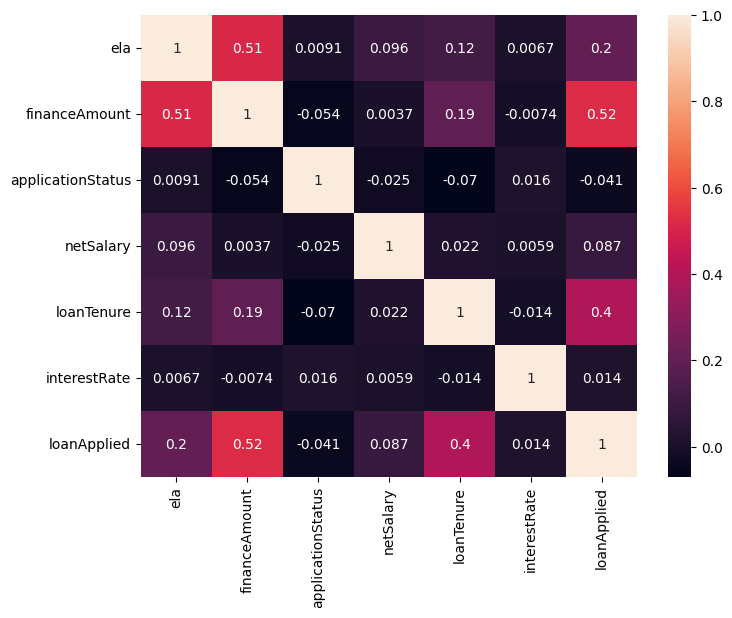

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=data.drop(['postcode'], axis=1).corr(numeric_only=True), annot=True)
plt.show()

'applicationStatus' has weak correlation to all numerical features. Therefore, there is no linear relationship between independent and dependent variables.

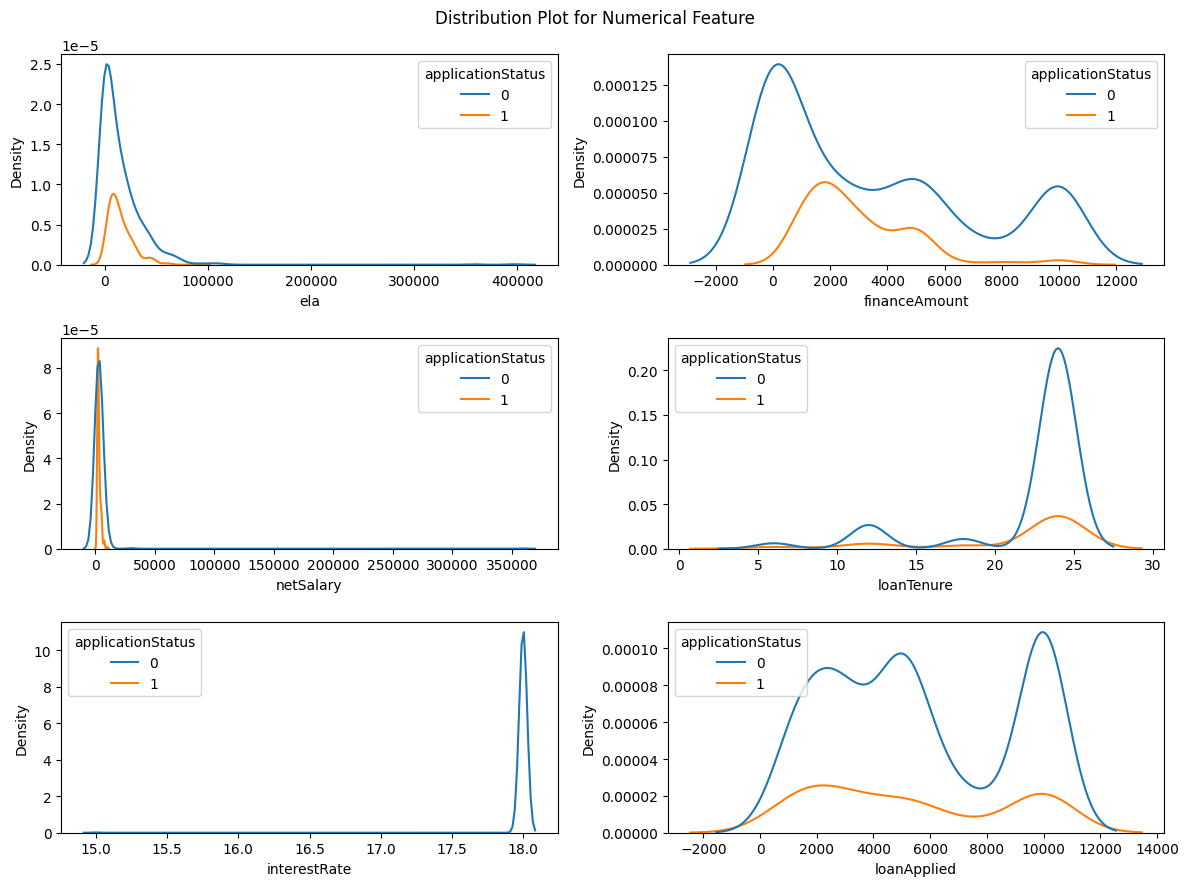

In [16]:
features = data.drop(['postcode', 'applicationStatus'], axis=1).select_dtypes(include=np.number).columns.tolist()
num_of_features = len(features)
ncols = 2
nrows = int(np.ceil(num_of_features / ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 3 * nrows))
fig.suptitle('Distribution Plot for Numerical Feature')
axs = axs.flatten()
for i, col in enumerate(features):
    sns.kdeplot(data, x=col, hue='applicationStatus', ax=axs[i], warn_singular=False)

plt.tight_layout()
plt.show()

- Analyzing the graphs here, it turns out that the values of the variable 'loanApplied' is relatively normally distributed (but a bit skewed to the right) with 3 peaks for REJECTED and 2 peaks for APPROVED. 
- 'ela', 'financeAmount' and 'netSalary' are skewed to th right.
- 'loanTenure' and 'interestRate' are skewed to the left.

# Modeling

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [18]:
drop_cols = ['address1', 'address2', 'address3', 'city', 'postcode', 'jobTitle']
X = data.drop(drop_cols + ['applicationStatus'], axis=1)
y = data['applicationStatus']

One-hot encoding for categorical features

In [19]:
X = pd.get_dummies(X, columns=['state', 'loanReason'], dtype=int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

Scaling for numerical features

In [20]:
scaled_cols = [col for col in X_train if not col.startswith('state') and not col.startswith('loanReason')]

scaler = StandardScaler()
X_train[scaled_cols] = scaler.fit_transform(X_train[scaled_cols])
X_test[scaled_cols] = scaler.transform(X_test[scaled_cols])

In [21]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'{classification_report(y_test, y_pred)}')

Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       160
           1       0.00      0.00      0.00        40

    accuracy                           0.80       200
   macro avg       0.40      0.50      0.44       200
weighted avg       0.64      0.80      0.71       200



/Users/jiaming/Desktop/JM/ArkMindAssessment/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jiaming/Desktop/JM/ArkMindAssessment/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jiaming/Desktop/JM/ArkMindAssessment/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [22]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'{classification_report(y_test, y_pred)}')

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       160
           1       0.61      0.70      0.65        40

    accuracy                           0.85       200
   macro avg       0.77      0.79      0.78       200
weighted avg       0.86      0.85      0.85       200



In [23]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'{classification_report(y_test, y_pred)}')

Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       160
           1       0.79      0.55      0.65        40

    accuracy                           0.88       200
   macro avg       0.84      0.76      0.79       200
weighted avg       0.87      0.88      0.87       200



In [24]:
gbc = GaussianNB()
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'{classification_report(y_test, y_pred)}')

Accuracy: 0.25
              precision    recall  f1-score   support

           0       1.00      0.06      0.12       160
           1       0.21      1.00      0.35        40

    accuracy                           0.25       200
   macro avg       0.61      0.53      0.23       200
weighted avg       0.84      0.25      0.16       200



In [25]:
knnc = KNeighborsClassifier()
knnc.fit(X_train, y_train)

y_pred = knnc.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'{classification_report(y_test, y_pred)}')

Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       160
           1       0.54      0.38      0.44        40

    accuracy                           0.81       200
   macro avg       0.70      0.65      0.66       200
weighted avg       0.79      0.81      0.80       200



In [26]:
svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'{classification_report(y_test, y_pred)}')

Accuracy: 0.835
              precision    recall  f1-score   support

           0       0.83      0.99      0.91       160
           1       0.89      0.20      0.33        40

    accuracy                           0.83       200
   macro avg       0.86      0.60      0.62       200
weighted avg       0.84      0.83      0.79       200



In [27]:
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

y_pred = xgbc.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'{classification_report(y_test, y_pred)}')

Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       160
           1       0.71      0.62      0.67        40

    accuracy                           0.88       200
   macro avg       0.81      0.78      0.79       200
weighted avg       0.87      0.88      0.87       200



In [28]:
cbc = CatBoostClassifier()
cbc.fit(X_train, y_train)

y_pred = cbc.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'{classification_report(y_test, y_pred)}')

Learning rate set to 0.009366
0:	learn: 0.6843798	total: 56.4ms	remaining: 56.3s
1:	learn: 0.6778040	total: 57ms	remaining: 28.4s
2:	learn: 0.6688742	total: 57.7ms	remaining: 19.2s
3:	learn: 0.6623871	total: 58.3ms	remaining: 14.5s
4:	learn: 0.6592739	total: 58.7ms	remaining: 11.7s
5:	learn: 0.6505240	total: 59.5ms	remaining: 9.85s
6:	learn: 0.6414227	total: 59.9ms	remaining: 8.5s
7:	learn: 0.6331701	total: 60.4ms	remaining: 7.49s
8:	learn: 0.6256742	total: 60.9ms	remaining: 6.71s
9:	learn: 0.6193636	total: 61.7ms	remaining: 6.11s
10:	learn: 0.6138214	total: 62.2ms	remaining: 5.59s
11:	learn: 0.6065651	total: 62.7ms	remaining: 5.16s
12:	learn: 0.6011171	total: 63.7ms	remaining: 4.83s
13:	learn: 0.5946083	total: 64.6ms	remaining: 4.55s
14:	learn: 0.5867993	total: 65.3ms	remaining: 4.29s
15:	learn: 0.5803981	total: 65.6ms	remaining: 4.03s
16:	learn: 0.5777974	total: 66.2ms	remaining: 3.83s
17:	learn: 0.5753849	total: 67ms	remaining: 3.65s
18:	learn: 0.5685340	total: 67.8ms	remaining: 3.5

Accuracy may not be an important metric for these experiments, it can be misleading when dealing with imbalanced datasets because it tends to be biased towards the majority class.
- Logistic Regression: It has very low precision, recall, and F1-score for class 1, indicating poor performance in identifying instances of the minority class.
- Decision Tree: While Decision Tree shows better performance for class 1 compared to Logistic Regression, its precision and recall for class 1 are still not very high.
- Random Forest: Random Forest performs relatively well in terms of recall for class 1, but its precision is lower, indicating potential misclassification of majority class instances as class 1.
- XGBoost: XGBoost shows decent performance for class 1 with higher precision, recall, and F1-score compared to the previous models.
- CatBoost: CatBoost continues to show the highest precision, recall, and F1-score for class 1 among all models, indicating better performance in identifying instances of the minority class.

Considering the imbalanced nature of the dataset, CatBoost still appears to be the best-performing model, as it achieves the highest scores for precision, recall, and F1-score for the minority class, indicating its effectiveness in dealing with imbalanced datasets. Therefore, CatBoost is the best choice for this classification.

In [29]:
feature_importance = cbc.feature_importances_
feature_names = X.columns

for importance, name in sorted(zip(feature_importance, feature_names), reverse=True):
    print(f"{name}: {importance:.2f}")

financeAmount: 32.89
ela: 26.30
loanApplied: 15.20
netSalary: 10.12
loanTenure: 3.47
loanReason_RENOVATION: 1.53
state_MELAKA: 1.27
loanReason_DEBTS CONSOLIDATION: 1.08
loanReason_EDUCATION: 1.00
loanReason_OTHER USAGE: 0.91
state_JOHOR: 0.82
state_KUALA LUMPUR: 0.81
state_NEGERI SEMBILAN: 0.79
loanReason_EXPAND BUSINESS: 0.76
state_SELANGOR: 0.70
state_PERAK: 0.58
loanReason_MEDICAL EXPENSES: 0.52
state_PENANG: 0.31
state_KEDAH: 0.25
state_PAHANG: 0.24
state_SARAWAK: 0.21
state_SABAH: 0.07
state_PUTRAJAYA: 0.06
state_KELANTAN: 0.06
state_LBN: 0.02
state_TERENGGANU: 0.02
state_PERLIS: 0.02
state_KUANTAN: 0.00
interestRate: 0.00


Features like "financeAmount" and "ela" have high importance scores, suggesting they strongly influence the model's decisions, while features like "interestRate" have negligible importance.

# Additional

## Simple Neural Network

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

In [31]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=30,
    batch_size=16,
    validation_data=(X_test.values, y_test.values)
)

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7140 - loss: 0.6032 - val_accuracy: 0.8000 - val_loss: 0.4886
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.7707 - loss: 0.5097 - val_accuracy: 0.8000 - val_loss: 0.4755
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.7767 - loss: 0.5041 - val_accuracy: 0.8000 - val_loss: 0.4637
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.7723 - loss: 0.4792 - val_accuracy: 0.8000 - val_loss: 0.4536
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.8043 - loss: 0.4305 - val_accuracy: 0.7950 - val_loss: 0.4430
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8253 - loss: 0.3883 - val_accuracy: 0.8000 - val_loss: 0.4317
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.8428 - loss: 0.3834 - val_accuracy: 0.8050 - val_loss: 0.4200
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.8474 - loss: 0.3838 - val_accuracy: 0.8100

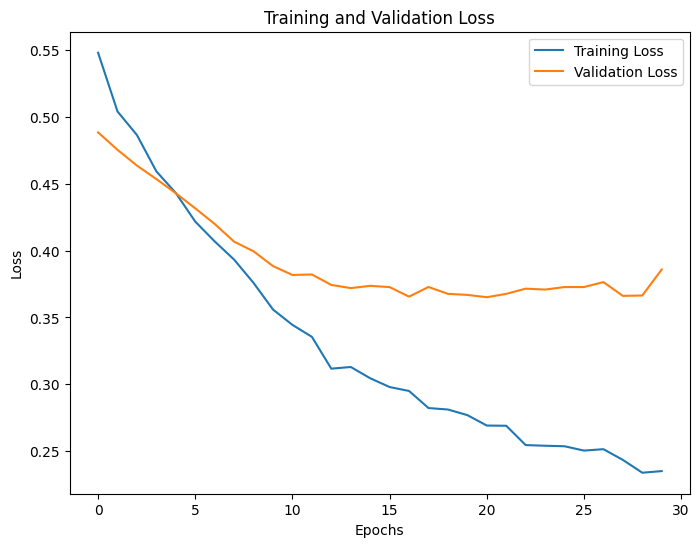

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [34]:
y_pred = model.predict(X_test.values)
y_pred = (y_pred > 0.5)

print(f'Accuracy: {accuracy_score(y_test.values, y_pred)}')
print(f'{classification_report(y_test.values, y_pred)}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.845
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       160
           1       0.67      0.45      0.54        40

    accuracy                           0.84       200
   macro avg       0.77      0.70      0.72       200
weighted avg       0.83      0.84      0.83       200



Neural networks require a larger amount of data to effectively capture the underlying patterns and relationships, making them more susceptible to overfitting on small datasets. This overfitting can manifest as decreasing training loss but increasing validation loss in 30 ephoces.